##### Usage example of LogGabor.LogGaborFit(   )

In [1]:
import pickle
from LogGabor import LogGaborFit
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rand
import matplotlib
from numpy.fft import fft2, fftshift, ifft2, ifftshift
%matplotlib inline
lg = LogGaborFit('https://raw.githubusercontent.com/bicv/SparseEdges/master/default_param.py')

##### Loading a dictionary 

M = {100, 200, 400, 800, 1000}

In [2]:
M = 1000
with open('database/dictionary_examples/SHL_homeo_M_{}_dico.pkl'.format(M), 'rb') as fp:
    dictx = pickle.load(fp).dictionary
#dictx = dictx[:200, :] # DEBUG
print('(M, N) =', dictx.shape)

(M, N) = (1000, 1024)


##### Fitting dictionary with LogGabor Patches

In [3]:
dictx_fit, dictx_fit_param, idx_unfitted, names = lg.LogGaborFit_dictionary(dictx, 
                                                                            verbose=False, get_unfitted=True, 
                                                                            whoswho=True)

In [4]:
print('List of filters with no fit = ', idx_unfitted)

List of filters with no fit =  []


'whoswho = True' to get the names of the LogGabor parameters

In [5]:
names

['dictx_fit_param[:,0] = x0',
 'dictx_fit_param[:,1] = y0',
 'dictx_fit_param[:,2] = theta',
 'dictx_fit_param[:,3] = sf_0',
 'dictx_fit_param[:,4] = Phase',
 'dictx_fit_param[:,5] = B_sf',
 'dictx_fit_param[:,6] = B_theta']

##### Results example

Showing 10 dictionary patches picked at random with corresponding fits

In [6]:
dictx.shape

(1000, 1024)

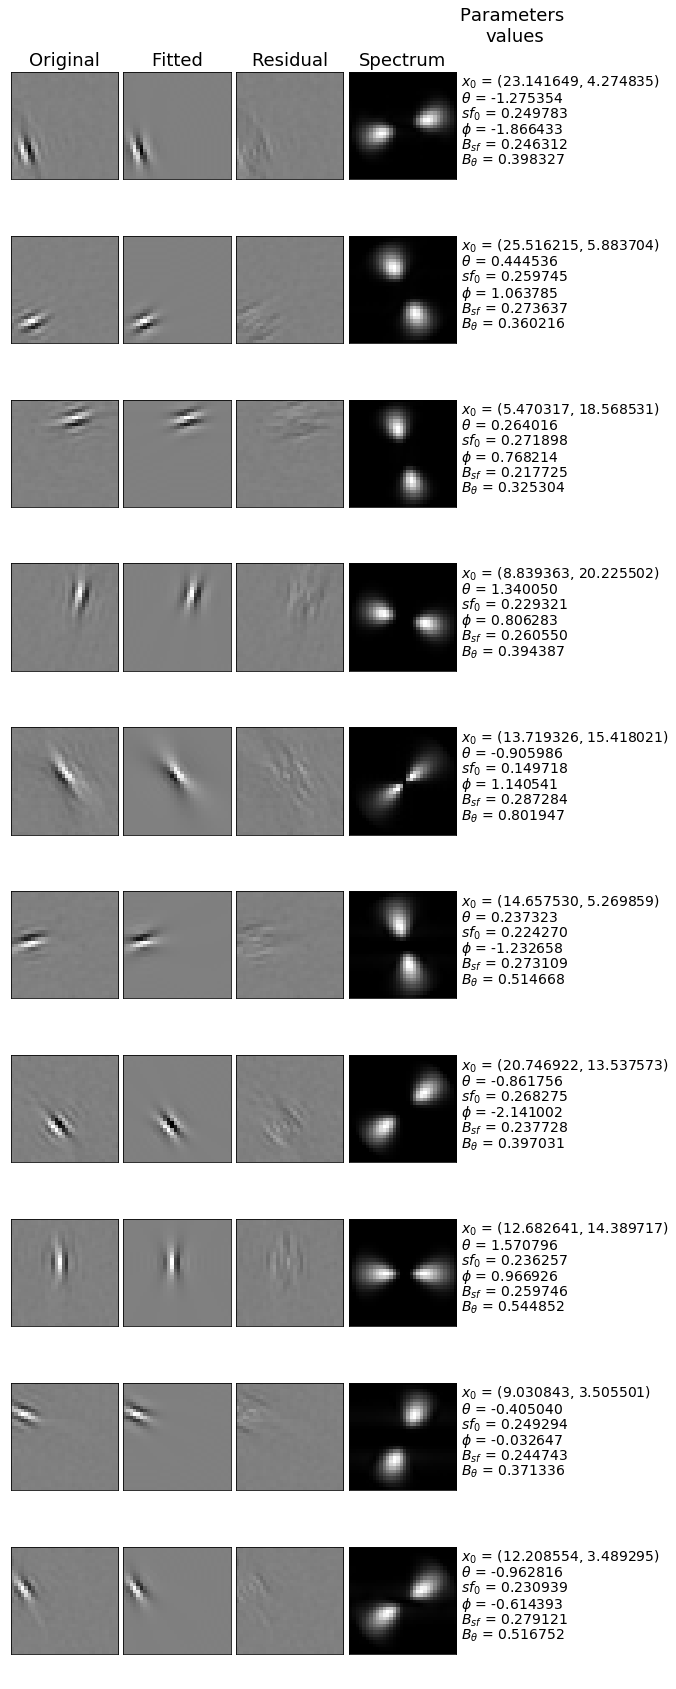

In [7]:
subplotpars = matplotlib.figure.SubplotParams(wspace=0.05, hspace=0.05)

nrows = 10 # numbers of dictionaries to show
ncols = 5 # number of columns: input, fit, residual, stats

fig, ax = plt.subplots(nrows, ncols, figsize=(10, 30), subplotpars=subplotpars) 

#idx = [23,  0, 38, 97, 17, 12, 19, 48, 94,  9]
idx = rand.permutation(dictx.shape[0])
idx = idx[:nrows]

for k in range(nrows):
        
    patch_original = np.reshape(dictx[idx[k],:],(32,32))
    cmax = np.max(np.abs(patch_original))
    patch_fitted = np.reshape(dictx_fit[idx[k],:],(32,32))
    residual = patch_original - patch_fitted
    spectrum = fftshift(fft2(patch_fitted))
    
    opts = dict(cmap='gray', vmin=-cmax, vmax=+cmax)
    opts2= dict(fontsize=14)
    
    i=0
    ax[k,i].imshow(patch_original, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Original', fontsize=18)
    
    i=1
    ax[k,i].imshow(patch_fitted, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Fitted', fontsize=18)
    
    i=2
    ax[k,i].imshow(residual, **opts)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Residual', fontsize=18)
        
    i=3
    ax[k,i].imshow(np.abs(spectrum), cmap='gray')
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    if k==0:
        ax[k,i].set_title('Spectrum', fontsize=18)
        

    i=4
    ax[k,i].text(0, 0.75, r'$x_0$ = (%3f, %3f)'%(dictx_fit_param[idx[k],0],dictx_fit_param[idx[k],1]), **opts2)
    ax[k,i].text(0, 0.65, r'$\theta$ = %3f'%(dictx_fit_param[idx[k],2]), **opts2)
    ax[k,i].text(0, 0.55, r'$sf_0$ = %3f'%(dictx_fit_param[idx[k],3]), **opts2)
    ax[k,i].text(0, 0.45, r'$\phi$ = %3f'%(dictx_fit_param[idx[k],4]), **opts2)
    ax[k,i].text(0, 0.35, r'$B_{sf}$ = %3f'%(dictx_fit_param[idx[k],5]), **opts2)
    ax[k,i].text(0, 0.25, r'$B_\theta$ = %3f'%(dictx_fit_param[idx[k],6]), **opts2)
    ax[k,i].xaxis.set_visible(False)
    ax[k,i].yaxis.set_visible(False)
    ax[k,i].spines["top"].set_visible(False)
    ax[k,i].spines["left"].set_visible(False)
    ax[k,i].spines["right"].set_visible(False)
    ax[k,i].spines["bottom"].set_visible(False)
    if k==0:
        ax[k,i].set_title('Parameters \nvalues', fontsize=18)
        